In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Getting The Data

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784',version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

70 thousand image

In [5]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
type(mnist)

sklearn.utils.Bunch

In [7]:
df = mnist.data

In [8]:
df.sample(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
17318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


784 columns == 28*28 matrix stored row side by side so 784 columns.

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [11]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [13]:
X=mnist.data.values

In [14]:
Y = np.array(mnist.target)

In [15]:
Y.shape

(70000,)

In [16]:
X[0].shape #Its 1D Array with 784 columns

(784,)

Matplotlib has function ,which take array of Image as input and print the image.

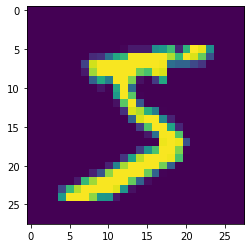

In [17]:
plt.imshow(X[0].reshape(28,28)) #imshow reshaping is required as image is 2D

In [18]:
print(Y[0])

5


Here MNIST Is MultiClass Classification as it have more then one Class.

We will convert this to binary by saying if not 5 then 0 otherwise 1.

In [19]:
Y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

As It is Of Object Type change to int

In [20]:
Y=Y.astype('int8')
type(Y)

numpy.ndarray

In [21]:
Y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [22]:
Y_5 =Y==5

In [23]:
Y==5

array([ True, False, False, ..., False,  True, False])

In [24]:
from sklearn.model_selection import train_test_split
x_train,xval,y_train,yval = train_test_split(X,Y_5) #Spliting With Data Is Random Process

In [25]:
x_train.shape,y_train.shape,xval.shape,yval.shape

((52500, 784), (52500,), (17500, 784), (17500,))

# Select And Train Model

In [26]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier() #What SGD Do Is That It tRain Dataset Multiple Times.

In [27]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [28]:
y_pred = sgd.predict(xval)

In [29]:
y_pred

array([False, False, False, ..., False, False, False])

In [30]:
yval

array([False, False, False, ..., False, False, False])

#IMP
Mean_squared_error is used for giving score only in case of regression not for classifier.

In Regression we see difference Between How Much Wrong it is for all point So Mean squared error.

While In Case Of Classification Either model predict correct output or not So No point In calculating The error.

So We will see How Accurately it is predicting The error.

Accuracy Score : It is Much Your Model Has Predicted The Correct Output.

= Correct Prediction /(correct+wrong)Prediction




In [31]:
(y_pred == yval).sum() #True Prediction

16774

In [32]:
17500-16748 #False Prediction

752

In [33]:
len(xval)

17500

In [34]:
xval.size  #As We Can See If We Do Size Here xval size getting Increased.

13720000

size 17500*784

In [35]:
accuracy = 16748/len(xval)

In [36]:
accuracy

0.9570285714285715

In [37]:
from sklearn.metrics import accuracy_score
mse = accuracy_score(y_pred,yval)
rmse = np.sqrt(mse)

In [38]:
mse

0.9585142857142858

Now Point to noted If Dataset is biased and unbiased Then Doing classification is Also a Difficult Task.

# Confusion Matrix

In [39]:
from sklearn import metrics

In [40]:
metrics.confusion_matrix(y_pred,yval)

array([[15346,   176],
       [  550,  1428]])

Confusion Matrix: Binary Classiification





---
           Predicted(neg,pos)
         -----------------
         |       |         |
         |       |         |
   Actua |       |         |    
         |       |         |
         |       |         |
         ---------------- 








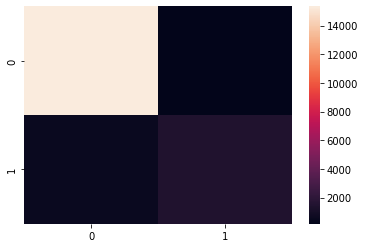

In [63]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_pred,yval))

TP,TN,FP,FN

          
          n     p

     n     TN   FP

     p    FN   TP



N/P-Positive Come Depending Upon Model
T/F - Will come depending Upon  Prediction is correct or not.











Precision = TP/(TP+FP) How Many Times My Model Has Predicted True Positive divided by Positive prediction.
(Mere Model Ne Kitne Baar Positive Predict kIya Tha Usmein Se Kitne Actual Mein Sahi Hai)

Recall = TP/(FN+TP)(Kitne Sahi The Positive mein,Aur Mere Model Ne predict Kr Liya_)
Kitne Reality Mein Positive The,Aur Un Positive Ko Mere Model Ne Pehchan Liya.

youtube kids ko unnecessary vdos Nhi dikhana hai toh mere yahi rhega ki jo bhi negative vdos hai usko mera model predict kr le,iss process mein agr mein kids wala vdo ko bhi false yani negative bta du toh kuch jaada frk nhi pdega,Lekin agr negative vdo(kids vdo jo nhi hai usko agr Positive kr du toh frk pdega).
precision = TP/(TP+FP)
Agr FP == 0 tb Precision jaada Hoga.

FP = Type1 error
TN = Type2 error

In [41]:
metrics.precision_score(y_pred,yval)

0.8902743142144638

In [42]:
metrics.recall_score(y_pred,yval)

0.7219413549039434

Recall Inversely Proportional To Precision.

Thresold directly Proportional to Precision.

Depending On Circumstances Precison should be high or recall should be high.

In [43]:
metrics.f1_score(y_pred,yval)

0.7973199329983249

f1_score  == Actually Hum Chahte Dono score ekdm Top ka ho,toh kyuna mean nikal le precision and recall ka lekin ismein drawback hai ki  agr dono mein se ek bhi high rha toh mean high ho jaayega.

Hume Chahiye ki dono bda ho tabhi aaye reseult bda.

Toh hume Arithrimitic mean na le kr Harmonic mean lena hoga.

1/a,1/b,1/c,1/d

a,b,c,d ap mein hai.

mean of reciprocal of ap sequence:


1/b = 1/(a+c)/2=
2*a*c/a+c


a=Precision
c = recall

Harmonic mean = f1score.


In [44]:
y_score = sgd.decision_function(xval) #decision function return score

#By default predict function return class whether it is true class or false class
#But now i want probability so i need score

In [45]:
y_score.min(),y_score.max()

(-112201.43012466788, 32141.307201504762)

Toh Hume abhi alg alg thereseold value lagana hai aur predict krna hai precision and recall.

In [46]:
precisions,recalls,theresold = metrics.precision_recall_curve(yval,y_score)

In [47]:
precisions.shape,recalls.shape,theresold.shape

((17128,), (17128,), (17127,))

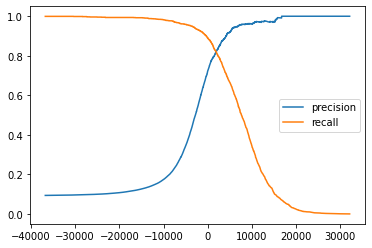

In [48]:
plt.plot(theresold,precisions[1:],label="precision")
plt.plot(theresold,recalls[1:],label= "recall")
plt.legend()
plt.show()

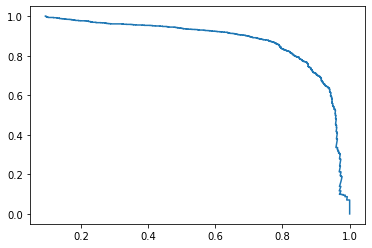

In [49]:
plt.plot(precisions,recalls,label= "recall")

# True Positive Rate and false positive rate(ROC)

          n     p

     n     TN   FP

     p    FN   TP

True positive rate == Actual mein jo positive the aur mere model ne bhi positive bta diya == TP/FN+TP

False Positive Rate == Actual Mein Wo Negative Tha Mere Model Ne positive print Kr diya.
==FP/TN+FP



In [50]:
fpr,tpr,theresold = metrics.roc_curve(yval,y_pred)

In [51]:
fpr.shape,tpr.shape,theresold.shape

((3,), (3,), (3,))

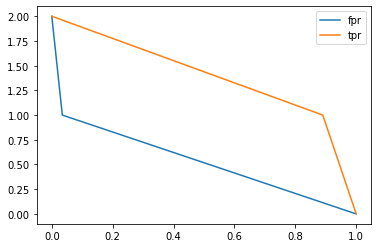

In [52]:
plt.plot(fpr, theresold, label = 'fpr')
plt.plot(tpr, theresold, label = 'tpr')

plt.legend()

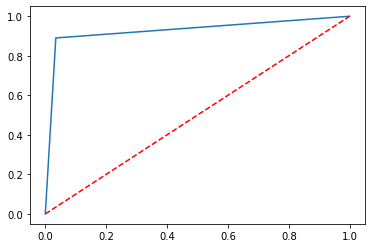

In [53]:
plt.plot(fpr,tpr,label= "auc")#auc curve area under the curve
plt.plot([0, 1], [0, 1], '--r') #agr iss line ke upr curve hai mtlb model acha perform kr rha

Let See Random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest = RandomForestClassifier()

In [56]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_score_forest = forest.predict_proba(xval)

In [58]:
y_score_forest

array([[0.96, 0.04],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [59]:
y_score_forest.ndim #2 value given whether 0 hone ka kitna probability hai 1 hone ka kitna probability hai

2

In [60]:
fpr_f,tpr_f,theresold_f = metrics.roc_curve(yval,y_score_forest[:,1])

In [61]:
fpr_f.shape,tpr_f.shape,theresold_f.shape

((101,), (101,), (101,))

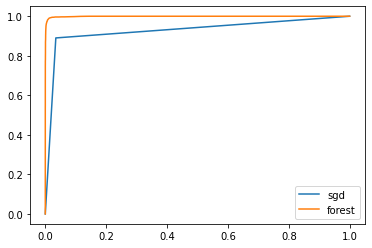

In [62]:
plt.plot(fpr,tpr,label= "sgd")#sgd
plt.plot(fpr_f,tpr_f,label= "forest")#forest
plt.legend()

#**MultiClass Classification**

##How to Make Multi Class Clasifier Using Binary Class Classification?



Ab dekho agr mein aisa kru jitna multi class classification krna hai,Utna Model rkhu jaise ek model sirf 0 ko pehchane baaki ko nhi,ek model 1 ko sirf pehchane baaki ko nhi aise krke.

fir jb mein test time pr input du toh wo bta ske ki 0 kitne probability se hai wo,1 kitni probability se hai wo like this.


Isko Bolte Hai "One Vs REST Model"


Total Models == n-Labels

Not-Feasible Solution So Number of classes*Dataset Size Is total Work Needed.

Ek Aur Model Hota Hai One VS One.



##Models : One Vs One 

A-N-1

B-N-2

C-N-3

...

Z-1

N(N+1)/2 Model requirement.


Complexity:(N-1)Dataset




#One Vs One

n_jobs == No of processor to use

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [65]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((52500, 784), (17500, 784), (52500,), (17500,))

In [66]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(sgd,n_jobs = -1)

In [67]:
ovo.fit(xtrain,ytrain)

OneVsOneClassifier(estimator=SGDClassifier(), n_jobs=-1)

In [69]:
y_pred_ovo = ovo.predict(xtest)

In [70]:
len(ovo.estimators_)

45

#One Vs Rest

In [71]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(sgd,n_jobs=-1)
ovr.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=SGDClassifier(), n_jobs=-1)

In [72]:
y_pred_ovr = ovr.predict(xtest)

In [73]:
len(ovr.estimators_)

10

In [75]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_ovr,ytest))
print(accuracy_score(y_pred_ovo,ytest))



0.8774285714285714
0.9166285714285715


RandomForestClassifier It is In built Multiclass Classifier.

In [76]:
forest = RandomForestClassifier()
forest.fit(xtrain,ytrain)
y_pred_for = forest.predict(xtest)
print(accuracy_score(y_pred_for,ytest))


0.9682857142857143
